# Работа с сетью. API

## Протокол HTTP

**Протокол HTTP** (Hypertext Transfer Protocol) является основным протоколом для обмена данными в Интернете. Он определяет структуру и правила взаимодействия между клиентом и сервером. HTTP используется для передачи гипертекстовых документов, таких как веб-страницы, изображения и другие ресурсы.  
URL (Uniform Resource Locator) является адресом ресурса в сети. Он определяет местонахождение ресурса и используется для доступа к нему.   
DNS (Domain Name System) предоставляет механизм преобразования удобочитаемых имен доменов в IP-адреса, которые используются для связи с серверами.  
Любое наше взаимодействие с ресурсами в сети Интернет – это отправка HTTP-запроса и получение HTTP-ответа.



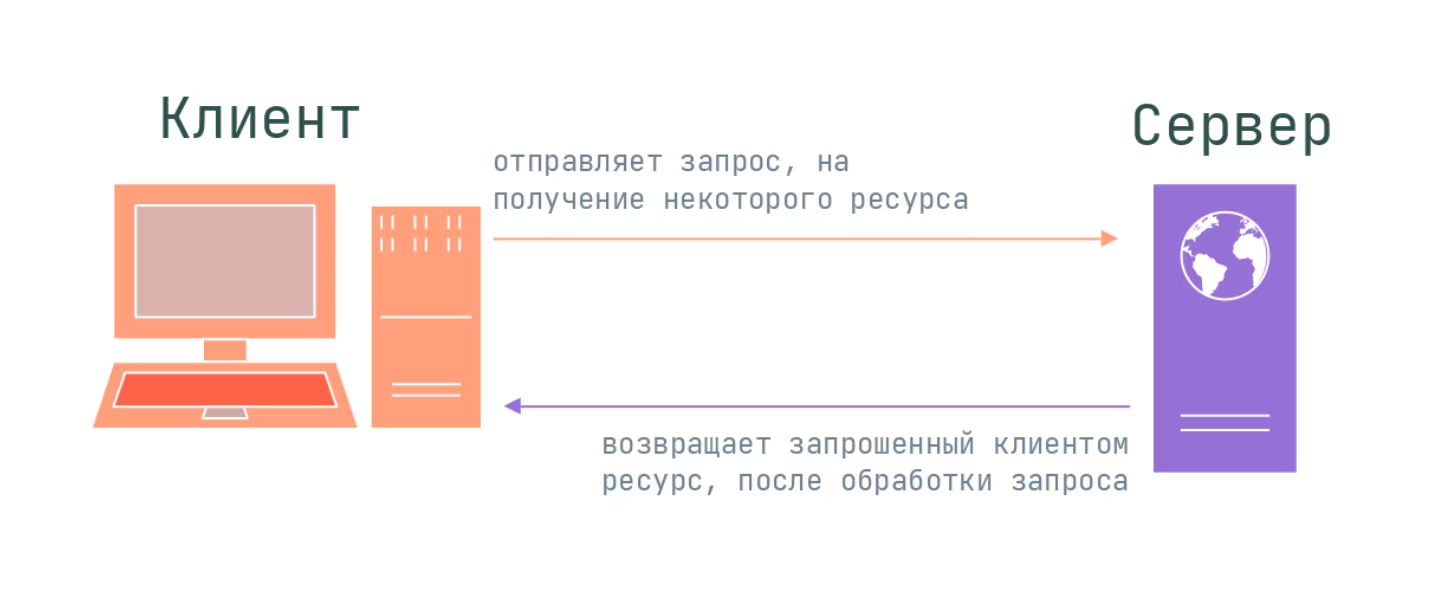

##### Основные типы (методы) запросов:

* GET – получить данные,  
* POST – отправить данные на сервер,  
* PUT, DELETE – обновить или удалить данные.

##### Примеры простых запросов


GET /index.html HTTP/1.1  
Host: www.example.com

POST /submit-form HTTP/1.1  
Host: www.example.com  
Content-Type: application/x-www-form-urlencoded  

name=John&age=30

PUT /new-resource HTTP/1.1  
Host: www.example.com  
Content-Type: application/json  

{"name": "New Resource", "value": "123"}

DELETE /resource/123 HTTP/1.1  
Host: www.example.com


Таким бразом, HTTP-запрос состоит из нескольких частей: 
* метод запроса (GET, POST, PUT, DELETE и другие), 
* URL ресурса, 
* заголовки запроса (например, User-Agent, Content-Type), 
тело запроса (для POST-запросов).



HTTP-ответ также имеет свою структуру и содержит 
* код состояния, 
* заголовки ответа (например, Content-Type, Content-Length),
* тело ответа (данные, отправленные сервером).


#### Примеры ответа на заданный запрос:

Запрос:
```
GET /index.html HTTP/1.1
Host: www.example.com
```
Ответ:  
```
HTTP/1.1 200 OK
Content-Type: text/html

<html>
<head><title>Example</title></head>
<body><h1>Welcome to Example.com!</h1></body>
</html>
```



##### пример запрос-ответ с заголовками

Запрос:
```
GET /data.json HTTP/1.1
Host: www.example.com
Accept: application/json
User-Agent: Mozilla/5.0
```
Ответ:
```
HTTP/1.1 200 OK
Content-Type: application/json
Cache-Control: no-cache

{"name": "Example", "value": "123"}
```

# Модуль requests

### Установка
В Python одной из наиболее популярных библиотек для работы с HTTP-запросами и HTTP-ответами является requests. Он предоставляет простой и интуитивно понятный интерфейс для взаимодействия с веб-сервисами. Перед использованием модуля requests его необходимо установить:


In [ ]:
#pip install requests

После этого модуль можно импортировать в скрипт и использовать, например, для получения данных с сервера. 

In [ ]:
import requests

### Get-запросы
Get-запрос – самый распространенный тип запроса.


In [ ]:
import requests

response = requests.get("https://example.com")
print(response.status_code)  # Выводит код состояния ответа
print(response.headers)  # Выводит заголовки ответа
print(response.text)  # Выводит данные, полученные от сервера


Этот запрос возвращает объект response. Самые полезные свойства и методы объекта response:
* `.status_code` – код ответа сервера (200 – всё ок, 404 – не найдено, 503 – сервис временно недоступен и т.д.),
* `.headers` – словарь с заголовком ответа,
* `.text` – ответ как строка,
* `.json()` – если сервер вернул JSON, этот метод превратит его в Python-словарь или список.


В некоторых случаях вместе с get-запросом нужно передать определенные параметры, от которых будет зависеть ответ сервера. Это можно сделать с помощью аргумента params:

In [ ]:
# Пример GET-запроса с параметрами
url = 'https://httpbin.org/get'  # Сервис для тестирования HTTP-запросов
params = {'course': 'Python', 'lang': 'ru'}

response = requests.get(url, params=params)

# Вывод результата
if response.status_code == 200:
    print(response.json())       # Тело ответа в формате JSON
else:
    print(f"Status code: {response.status_code}")


Параметры будут переданы серверу в URL-адресе после символа ?, поэтому ответ сервера в нашей программе будет такой же, как если бы мы в адресной строке набрали:
`https://httpbin.org/get?course=Python&lang=ru`




#### Пример с google поиском


К любому поисковому запросу можно добавить дополнительные GET-параметры в формате «имя — значение» (name-value). Это помогает получить более точный и релевантный ответ, например, когда мы ищем товары в интернет-магазине, настраивая фильтры по производителю, цене и так далее.

Главное — правильно задать дополнительные параметры. У них простой синтаксис:

* начало строки обозначается вопросительным знаком ?;
* все параметры разделяются между собой амперсандом &.

Правильный список параметров метода GET будет выглядеть так: `? name1=value1& name2=value2& name3=value3`, где name — имя параметра, а value — его значение.

Посмотрим, как это используется на практике. Откроем Google и введём в поисковую строку запрос кот бегемот. Если посмотреть на URL открывшейся страницы, то мы увидим такой текст: `https://www.google.ru/search?q=кот+бегемот& hl=ru& tbm=isch`

Что означают дополнительные параметры в этом случае? q — поисковый запрос кот бегемот, параметр hl отвечает за язык интерфейса, а вот tbm определяет, среди какого типа контента идёт поиск. У него значение isch — искать среди картинок.

Если ввести этот же запрос в браузер без tbm — `https://www.google.ru/search?q=кот+бегемот& hl=ru`, то Google выдаст результат в общем поиске, а не только среди изображений

### Другие запросы
Запросы POST, PUT, DELETE используются для изменения данных на сервере, например, для создания или обновления ресурсов. Синтаксис этих запросов в модуле requests аналогичный, но появляется возможность отправлять большие объемы данных в теле запроса. 


In [ ]:
# Пример POST-запроса с данными
url = 'https://httpbin.org/post'  # Сервис для тестирования HTTP-запросов
data = {
    'name': 'example',
    'job': 'tester'
}

response = requests.post(url, json=data)

# Вывод результата
if response.status_code == 200:
    print(response.json())       # Тело ответа в формате JSON
else:
    print(f"Status code: {response.status_code}")


Дата-аналитики обычно не занимаются поддержкой веб-ресурсов, поэтому для нас актуально получение данных, а не их публикация. По этой причине мы ограничимся изучением get-запросов.


In [ ]:
# задания для закрепления

# Работа с API
Современный дата-аналитик часто работает с данными, полученными не из файлов, а напрямую из интернета. Это могут быть:
* данные о погоде,
* курсы валют,
* информация с веб-сервисов (например, данные о фильмах с IMDb),
* внутренние корпоративные базы.
  
Доступ к таким данным часто предоставляется через API (Application Programming Interface) – интерфейс для программного взаимодействия с веб-сервисом. В общем случае API – это набор определенных правил и протоколов, которые позволяют различным приложениям взаимодействовать между собой. В случае взаимодействия с веб-сервером в качестве протокола почти всегда используется HTTP. Когда мы обращаемся к API сервера, мы отправляем HTTP-запрос и получаем HTTP-ответ. Ответ всегда имеет определенный формат (обычно json с заранее определенной структурой), который можно заранее изучить по документации этого API.
Таким образом для работы с любым API необходимо:
1. Найти и изучить документацию API.

2. Из документации узнать:
* URL для обращения к API (так называемый endpoint),
* обязательные параметры (например, ключ),
* формат ответа (чаще всего JSON).
* Адаптировать обращение к API под Python с requests.


### Пример API: random-data-api.com
Например, воспользуемся ресурсом `random-data-api.com` и изучим его документацию:


https://random-data-api.com/documentation

На этой странице можно найти список ресурсов сервера:
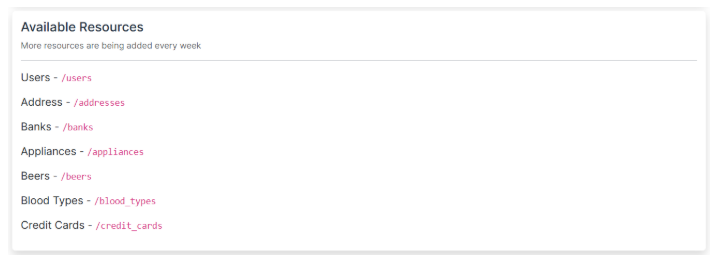

А так же формат обращения к ним:

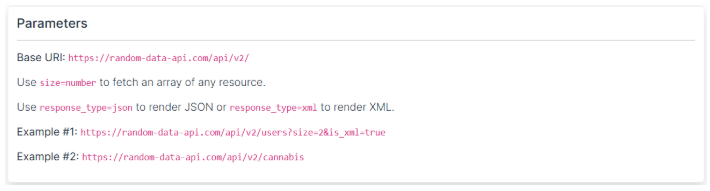

Воспользуемся ресурсом users – он выдает фейковые случайные данные о пользователях. Мы можем обратиться к этому API и изучить его ответ:


In [ ]:
response = requests.get('https://random-data-api.com/api/v2/users?size=1')
res=response.json()
for key, value in res.items():
    print(f"{key}: {value}")

Когда мы узнали формат ответа, список полей в возвращаемом JSON, мы можем делать более сложные запросы к API.


In [ ]:
params = {'response_type' : 'json', 'size' : 10}
response = requests.get('https://random-data-api.com/api/v2/users', params=params)
res=response.json()
for person in res:
    print(f"{person['last_name']:15} {person['first_name']:15} {person['email']}")

### Пример API: weatherapi.com
Большинство API с реальной, нефейковой информацией требуют регистрации и подписки, поэтому доступ к ним осуществляется по специальному уникальному API-ключу. В качестве примера рассмотрим ресурс weatherapi.com, предоставляющий информацию о погоде. 
Зарегистрируйтесь на сайте weatherapi.com, подтвердите регистрацию, пройдя по ссылке из полученного письма, войдите в созданный аккаунт и найдите вверху страницы строку с API Key. После этого изучите документацию API на странице по ссылке: 


https://www.weatherapi.com/docs/


Простейший запрос текущей погоды будет иметь вид:


In [ ]:
API_KEY = "сюда нужно вставить ваш API-ключ"
city = "Berlin"
params = {'key': API_KEY, 'q': city}
url = f"http://api.weatherapi.com/v1/current.json"

response = requests.get(url, params)
data = response.json()

for key, value in data.items():
    print(f"{key}: {value}")

Или можно выбрать отдельную полезную информацию из json:


In [ ]:
print(f"Город: {data['location']['name']}")
print(f"Время: {data['location']['localtime']}")
print(f"Температура: {data['current']['temp_c']} C")
print(f"Ощущается как: {data['current']['feelslike_c']} C")
print(f"Влажность: {data['current']['humidity']} %")

In [ ]:
# Задания для закрепления

# Практическая работа
1. **Знакомство с API**  
Изучите ресурсы сайта сайта random-data-api.com. Выберите любой на свое усмотрение. Напишите программу, которая:
спрашивает у пользователя, сколько результатов выбранного ресурса он хочет получить, 
проверяет доступность ресурса, 
если сайт не доступен, выводит код его статуса, если доступен, то выводит нужное количество отформатированных строк с тремя-четырьмя полями на ваш выбор.
*Пример ввода:*  
Сколько видов пива вы хотите получить? 3

*Пример вывода:*  
```
Производитель: Fosters        Название: Sapporo Premium              Тип: Light Lager   Крепость: 8.5%
Производитель: Birra Moretti  Название: Dreadnaught IPA              Тип: Sour Ale      Крепость: 8.3%
Производитель: Sapporo        Название: Founders Kentucky Breakfast  Тип: Merican Ale   Крепость: 3.5%
```

In [ ]:
import requests

url = 'https://random-data-api.com/api/v2/beers'
count = int(input("Сколько видов пива вы хотите получить? "))
params = {'size': count, 'response_type': 'json'}
beer_response = requests.get(url, params)

if beer_response.status_code != 200:
    print(f"Не удалось получить данные. Код статуса: {beer_response.status_code}")
else:
    beers = beer_response.json()
    for beer in beers:
        print(f"Производитель: {beer['brand']:20} Название: {beer['name']:40} Тип: {beer['style']:30} Крепость: {beer['alcohol']}")


2. **Курс обмена валют**
    
Изучите документацию API: https://www.alphavantage.co/documentation/ и получите бесплатный API-ключ. Найдите функцию API, предоставляющую информацию о текущем курсе обмена валют. Напишите программу, которая спрашивает у пользователя сумму, текущую валюту, и в какую валюту необходимо произвести конвертацию. После этого выводит результат.

*Пример ввода:*  
Введите сумму: 1000  
Введите текущую валюту: JPY  
Введите желаемую валюту: AED

*Пример вывода:*  
1000 Japanese Yen = 24.9 United Arab Emirates Dirham


In [ ]:
import requests

amount = int(input("Введите сумму: "))
from_cur = input("Введите текущую валюту: ")
to_cur = input("Введите желаемую валюту: ")

params = {
    'function' : 'CURRENCY_EXCHANGE_RATE',
    'from_currency' : from_cur,
    'to_currency' : to_cur,
    'apikey' : 'сюда нужно вставить ваш API-ключ'
    }

url = 'https://www.alphavantage.co/query'
res = requests.get(url, params)
data = res.json()

try:
    rate = float(data['Realtime Currency Exchange Rate']['5. Exchange Rate'])
    from_cur = data['Realtime Currency Exchange Rate']['2. From_Currency Name']
    to_cur = data['Realtime Currency Exchange Rate']['4. To_Currency Name']
    print(f"{amount} {from_cur} = {amount * rate} {to_cur}")
except:
    print("Ожидаемая информация не получена. Проверьте валютную пару")


### Что почитать?  
https://selectel.ru/blog/http-request/